### In this notebook I am modeling the scattering noise by using the motion of L2 stage and comparing it with the actual noise in the h(t) channel. The individual phase and radiation noise as a result of this L2 stage motion as well as the total quadrature sum is shown in the plots.

In [1]:
import argparse
import numpy as np
import os
import pandas as pd
from gwtrigfind import find_trigger_files
from gwpy.table import EventTable
from gwpy.segments import DataQualityDict
from gwpy.timeseries import TimeSeries
from gwpy.frequencyseries import FrequencySeries
import datetime
from gwpy.time import tconvert
from gwpy.time import from_gps
from gwpy.time import to_gps
from gwpy.segments import Segment
from datetime import timedelta
from itertools import islice
from scipy.signal import correlate
import matplotlib.pyplot as plt
from gwpy.table import Table
import time
import h5py
from gwpy.segments import SegmentList
from gwpy.timeseries import TimeSeriesDict
from gwdetchar import scattering
from gwpy.segments import DataQualityFlag

In [3]:
import seaborn as sns
sns.set_style('whitegrid')
#plt.style.use('fivethirtyeight')

In [16]:
import functions

In [18]:
# functions.plot_asdgds(1262389546,20,1245294018,20,5)

/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py37/lib/python3.7/site-packages/gwpy/timeseries/core.py:1153: NDSWarning: unique NDS2 channel match not found for 'L1:GDS-CALIB_STRAIN_CLEAN'
  io_nds2.NDSWarning)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py37/lib/python3.7/site-packages/gwpy/io/nds2.py:298: NDSWarning: Error authenticating against nds.ligo.caltech.edu:31200
  NDSWarning)


Please provide username for the LIGO.ORG kerberos realm:  siddharth.soni
Password for siddharth.soni@LIGO.ORG:  ············


Kerberos ticket generated for siddharth.soni@LIGO.ORG


/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py37/lib/python3.7/site-packages/gwpy/timeseries/core.py:1153: NDSWarning: unique NDS2 channel match not found for 'L1:SUS-ETMX_L2_WIT_L_DQ'
  io_nds2.NDSWarning)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py37/lib/python3.7/site-packages/gwpy/timeseries/core.py:1153: NDSWarning: unique NDS2 channel match not found for 'L1:GDS-CALIB_STRAIN_CLEAN'
  io_nds2.NDSWarning)


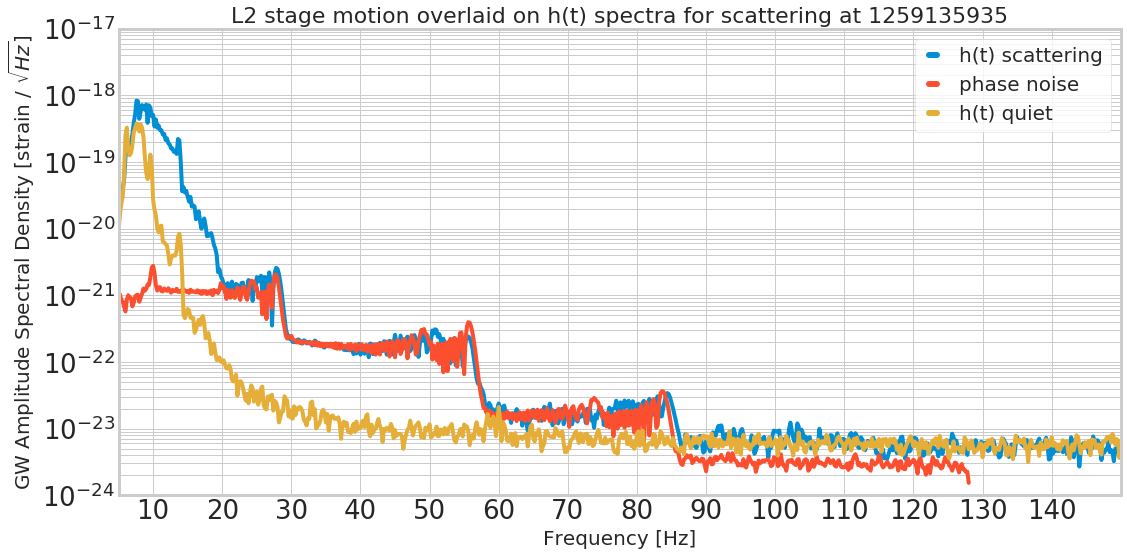

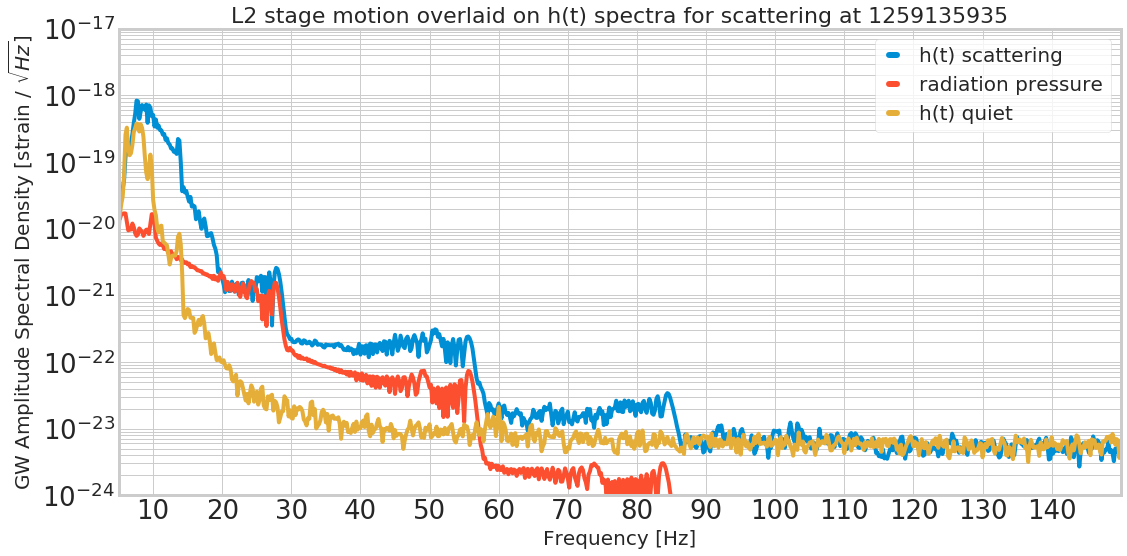

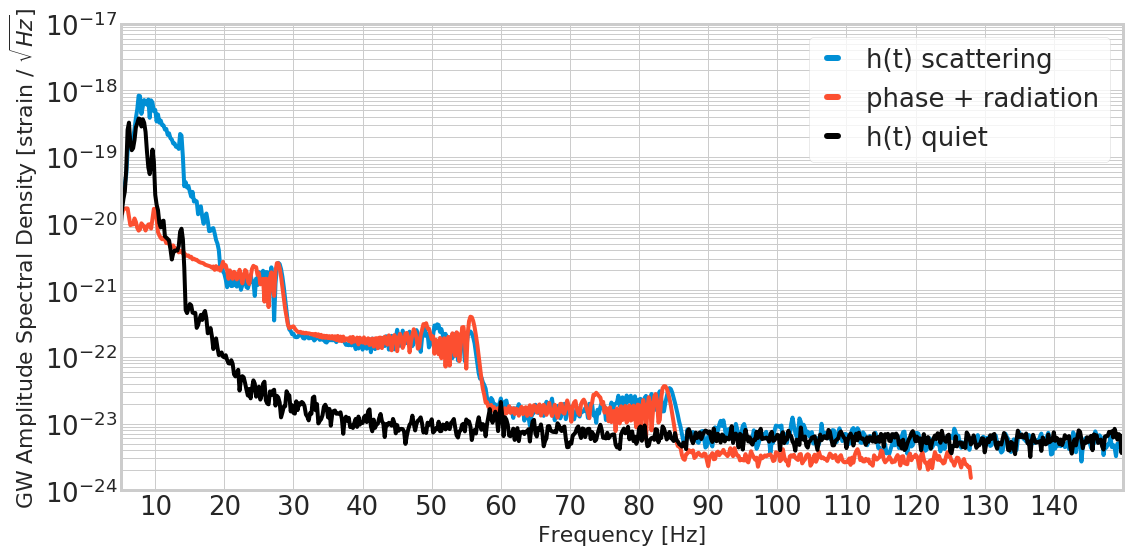

In [20]:
functions.compare_gds_l2(to_gps('2019-11-30 07:58:37'),to_gps('2019-11-30 07:58:27'),20,5,20,5,correction_factor=1.37,ref_c1=0.0002,ref_c2=5e-5,ref_c3=5e-6)

In [22]:
#functions.compare_gds_l2(1259267822,1259267812,20,5,20,5,correction_factor=1.4,ref_c1=0.0002,ref_c2=5e-5,ref_c3=7e-6)

In [23]:
#functions.compare_gds_l2(1259255523.31,1259255513.31,20,5,20,5,correction_factor=1.45,ref_c1=0.0002,ref_c2=5e-5,ref_c3=5e-6)

In [21]:
# functions.compare_gds_l2?

/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py37/lib/python3.7/site-packages/gwpy/timeseries/core.py:1153: NDSWarning: unique NDS2 channel match not found for 'L1:GDS-CALIB_STRAIN_CLEAN'
  io_nds2.NDSWarning)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py37/lib/python3.7/site-packages/gwpy/io/nds2.py:298: NDSWarning: Error authenticating against nds.ligo.caltech.edu:31200
  NDSWarning)


Please provide username for the LIGO.ORG kerberos realm:  siddharth.soni
Password for siddharth.soni@LIGO.ORG:  ············


Kerberos ticket generated for siddharth.soni@LIGO.ORG


/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py37/lib/python3.7/site-packages/gwpy/timeseries/core.py:1153: NDSWarning: unique NDS2 channel match not found for 'L1:SUS-ETMX_L2_WIT_L_DQ'
  io_nds2.NDSWarning)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py37/lib/python3.7/site-packages/gwpy/timeseries/core.py:1153: NDSWarning: unique NDS2 channel match not found for 'L1:GDS-CALIB_STRAIN_CLEAN'
  io_nds2.NDSWarning)


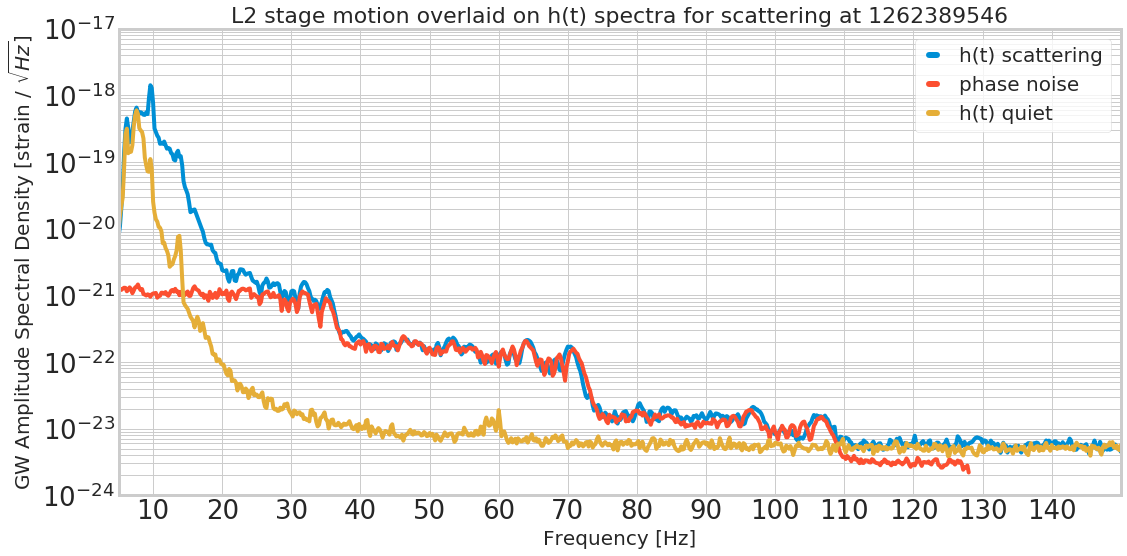

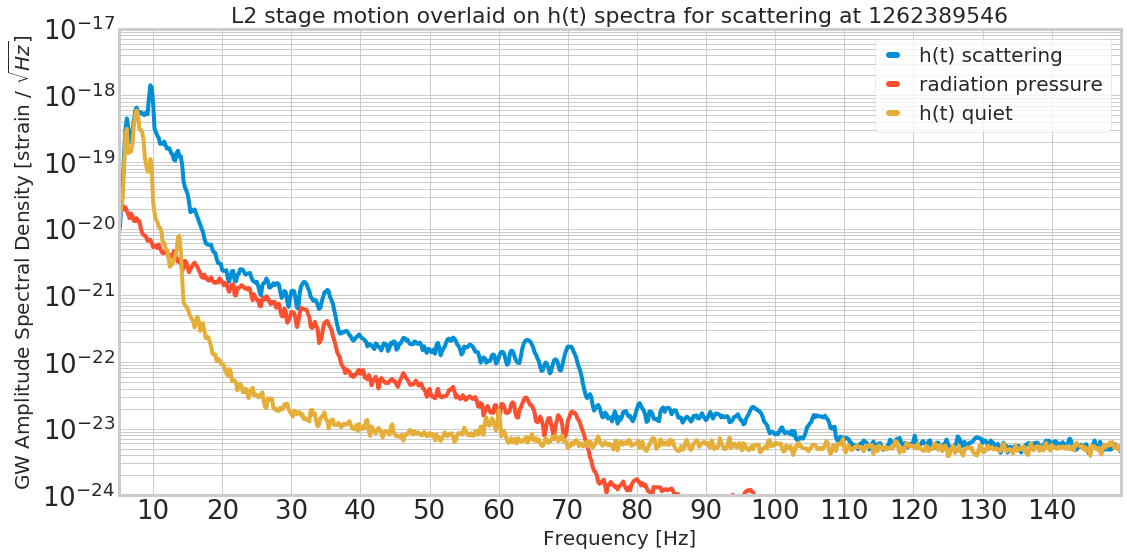

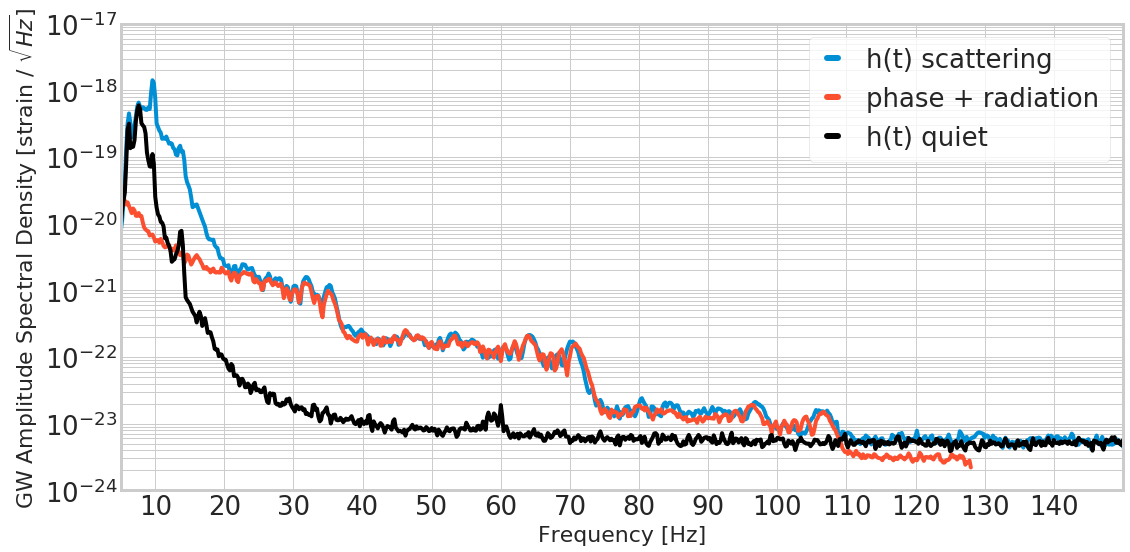

In [9]:
functions.compare_gds_l2(1262389546,1262389531,60,5,60,5,correction_factor=1.43,ref_c1=2e-4,ref_c2=5e-5,ref_c3=5e-6)

In [24]:
#functions.compare_gds_l2(1262377841.188,1262377831.188,20,5,20,5,correction_factor=1.42,ref_c1=0.0004,ref_c2=9e-5,ref_c3=9e-6)

In [25]:
#functions.compare_gds_l2(1262376565.625,1262376565.625-10,20,5,20,5,correction_factor=1.42,ref_c1=4e-4,ref_c2=9e-5,ref_c3=9e-6)

In [26]:
#functions.compare_gds_l2(1262377661.188,1262377661.188-10,20,5,20,5,correction_factor=1.42,ref_c1=4e-4,ref_c2=9e-5,ref_c3=9e-6)

### Scattering noise (scatter shelf) in Transmitted photo-diode channels and h(t)

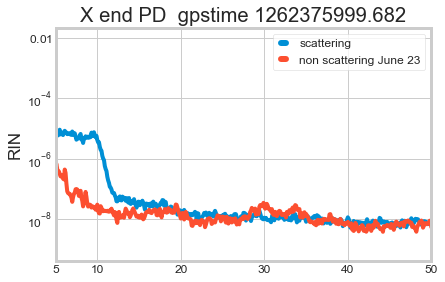

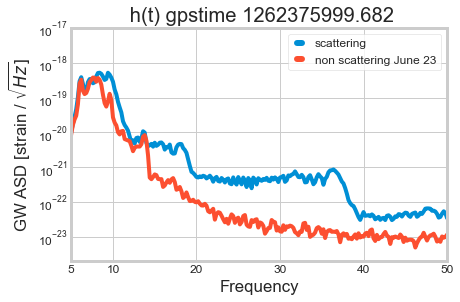

In [16]:
functions.compare_transmons(1262375999.682,50,10)

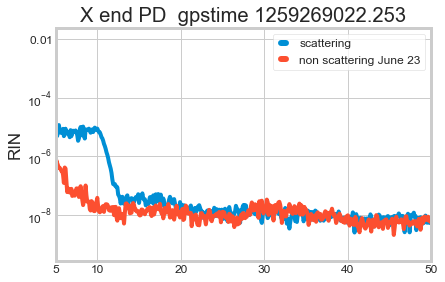

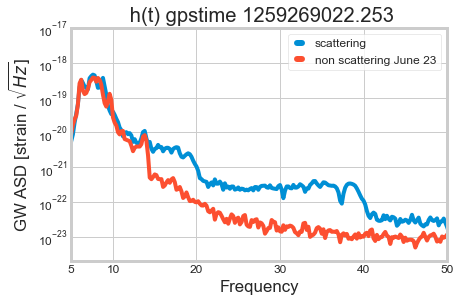

In [19]:
functions.compare_transmons(1259269022.253,20,10)

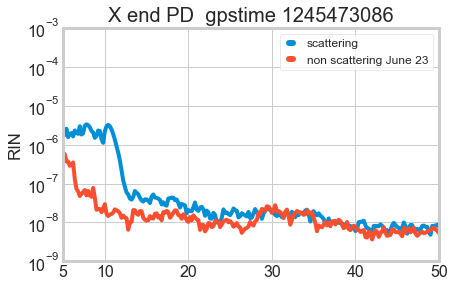

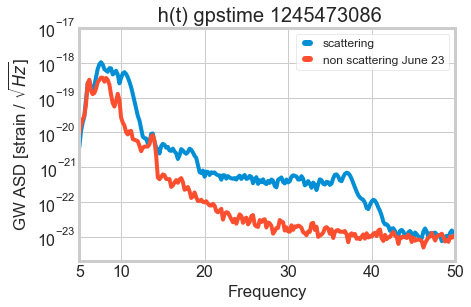

In [6]:
functions.compare_transmons(1245473086,20,5)  ### Pre R0 tracking, in the Paper

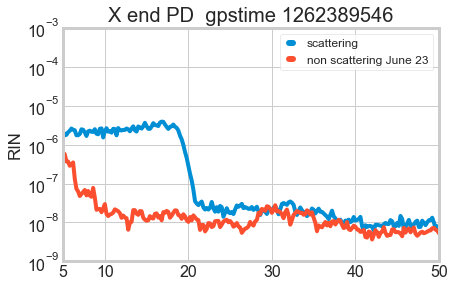

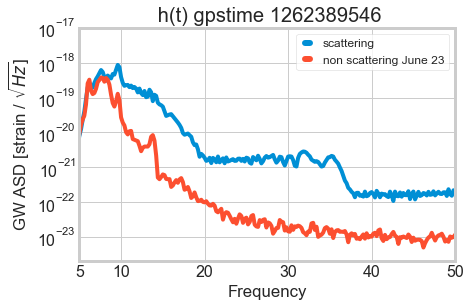

In [7]:
functions.compare_transmons(1262389546,20,5)  ### Pre R0 tracking, the BIG one

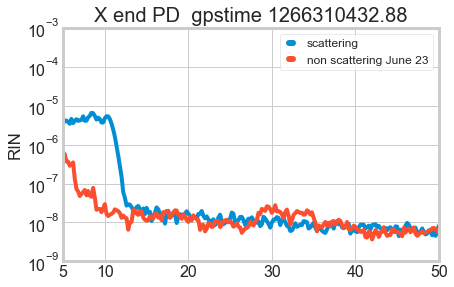

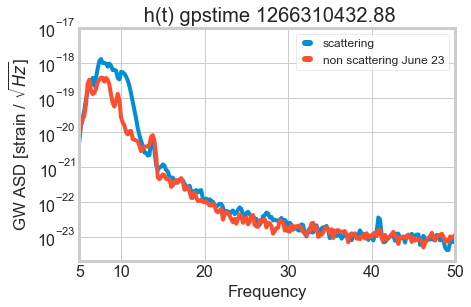

In [8]:
functions.compare_transmons(1266310432.88,20,5) ### Post R0, transmon scattering, in the paper

https://ldas-jobs.ligo-la.caltech.edu/~siddharth.soni/ScatOmega/output/outputgpstime50c1/1266310432.875/

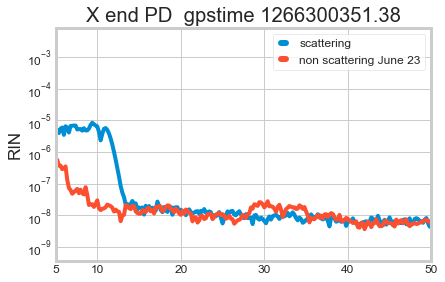

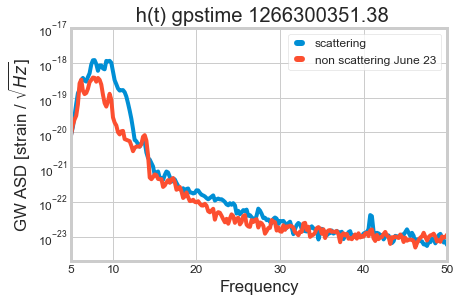

In [26]:
functions.compare_transmons(1266300351.38,20,5) ### Post R0, transmon scattering

https://ldas-jobs.ligo-la.caltech.edu/~siddharth.soni/ScatOmega/output/outputgpstime50c1/1266300351.375/

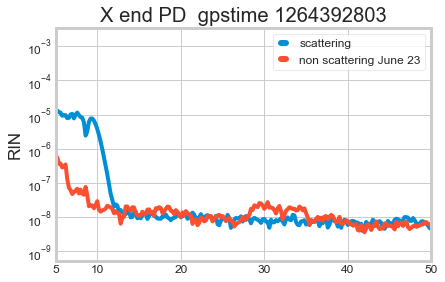

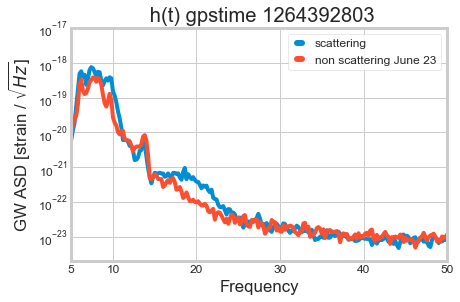

In [27]:
functions.compare_transmons(1264392803,20,5) ### Post R0, transmon scattering

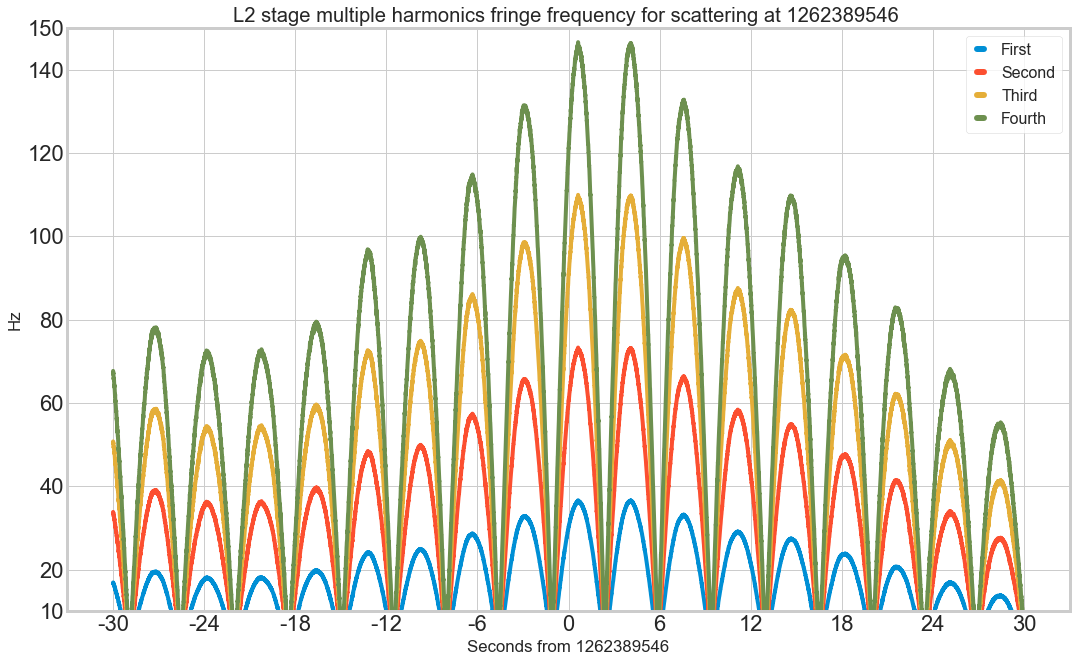

In [31]:
from gwdetchar.scattering import get_fringe_frequency
plt.figure(figsize=(16,10))
tssusl2 = TimeSeries.fetch('L1:SUS-ETMX_L2_WIT_L_DQ',1262389546-30,1262389546+30)*1.45
plt.plot(get_fringe_frequency(tssusl2,multiplier=1),label='First')
plt.plot(get_fringe_frequency(tssusl2,multiplier=2),label='Second')
plt.plot(get_fringe_frequency(tssusl2,multiplier=3),label='Third')
plt.plot(get_fringe_frequency(tssusl2,multiplier=4),label='Fourth')
plt.xticks(np.arange(1262389546-30,1262389546+36,6),np.arange(-30,36,6),fontsize=22)
plt.ylim(10,150)
plt.ylabel("Hz")
plt.xlabel("Seconds from 1262389546")
plt.yticks([10] + list(np.arange(20,160,20)) + [150],[10] + list(np.arange(20,160,20)) + [150],fontsize=22)
plt.legend(fontsize=16)
plt.title("L2 stage multiple harmonics fringe frequency for scattering at 1262389546 ")
plt.show()

https://ldas-jobs.ligo-la.caltech.edu/~siddharth.soni/1262389546trans_lin3/

********************************************************************************************************
********************************************************************************************************

In [15]:
## Radiation pressure and Phase noise

In [14]:
# def compare_gds_l2(starttime_quiet, starttime_gds,starttime_l2,dur_gds,fft_gds,dur_l2,fft_l2,correction_factor=1.35,ref_c1=0.001,ref_c2=9e-5,ref_c3=9e-6):

        
#         overlapgds = fft_gds/2
#         windowgds = dur_gds/2
#         overlapl2 = fft_l2/2
#         fac = 12.56/1.064
        
        
#         ### TimeSeries of h(t) and L2 STAGE
#         t = TimeSeries.fetch('L1:GDS-CALIB_STRAIN_CLEAN',starttime_gds-windowgds,starttime_gds+windowgds).detrend().asd(fft_gds,overlapgds)  
#         t_etmx = TimeSeries.fetch('L1:SUS-ETMX_L2_WIT_L_DQ',starttime_l2,starttime_l2+dur_l2).detrend()*correction_factor
#         t_quiet = TimeSeries.fetch('L1:GDS-CALIB_STRAIN_CLEAN',starttime_quiet-windowgds,starttime_quiet+windowgds).detrend().asd(fft_gds,overlapgds)


       
#         #First harmonic
#         t_etmxsin = TimeSeries(np.sin((t_etmx*1*fac*t_etmx.unit).value), t0 = t_etmx.t0.value, dt = t_etmx.dt.value).detrend()
#         t_etmxcos = TimeSeries(np.cos((t_etmx*1*fac*t_etmx.unit).value), t0 = t_etmx.t0.value, dt = t_etmx.dt.value).detrend()
        
#         # Second harmonic
#         t_etmxsin1 = TimeSeries(np.sin((t_etmx*2*fac*t_etmx.unit).value), t0 = t_etmx.t0.value, dt = t_etmx.dt.value).detrend()
#         t_etmxcos1 = TimeSeries(np.cos((t_etmx*2*fac*t_etmx.unit).value), t0 = t_etmx.t0.value, dt = t_etmx.dt.value).detrend()
        
#         # Third harmonic
#         t_etmxsin2 = TimeSeries(np.sin((t_etmx*fac*3*t_etmx.unit).value), t0 = t_etmx.t0.value, dt = t_etmx.dt.value).detrend()
#         t_etmxcos2 = TimeSeries(np.cos((t_etmx*fac*3*t_etmx.unit).value), t0 = t_etmx.t0.value, dt = t_etmx.dt.value).detrend()


#         ### Parameters
#         Tr=4e-6     # transmissivity
#         lamda=1e-6  # wavelength
#         L = 4000    # arm length
#         c=3e8       # Speed of light
#         M=40*((2*np.pi)**2) # M*(2*pi)**2, M is mass of the Mirror
#         P_arms=2e5  # Arm Power 
#         omega = 0.45   # Suspension Eigenfrequency
#         itm,srm = 0.0148,0.324   # tranmission
        
       

#         ### Phase noise
#         phase_1 = (1/np.pi)*Tr*lamda*ref_c1*(0.125/L)*t_etmxsin.asd(fft_l2,overlapl2)
#         phase_2 = (1/np.pi)*Tr*lamda*ref_c2*(0.125/L)*t_etmxsin1.asd(fft_l2,overlapl2)
#         phase_3 = (1/np.pi)*Tr*lamda*ref_c3*(0.125/L)*t_etmxsin2.asd(fft_l2,overlapl2)
        
#         phase_sum = phase_1 + phase_2 + phase_3
        

        
#         ### Radiation Pressure
#         r_prime = (np.sqrt(1 - itm) - np.sqrt(1 - srm))/(1 - np.sqrt(1 - itm)*np.sqrt(1 - srm))
#         gamma =  (1 - r_prime )**-1     # Signal gain
#         rad_factor = (4*gamma*P_arms)/(M*c*L)
#         f_sq = [omega**2 - i**2 for i in np.arange(0,128+1/fft_l2,1/fft_l2)] # ()
#         one_over_f_sq = [i**-1 for i in f_sq]
        
#         transfer_func_rad = [rad_factor*i for i in one_over_f_sq] ## X_eff/RIN
        
        
#         rad_1 = transfer_func_rad*t_etmxcos.asd(fft_l2,overlapl2)*Tr*ref_c1
#         rad_2 = transfer_func_rad*t_etmxcos1.asd(fft_l2,overlapl2)*Tr*ref_c2
#         rad_3 = transfer_func_rad*t_etmxcos2.asd(fft_l2,overlapl2)*Tr*ref_c3
        
#         rad_sum = rad_1 + rad_2 + rad_3
        
        
        
        

#         ### Phase noise + Radiation pressure noise
#         ht_tot = np.add([i**2 for i in phase_sum.value],[j**2 for j in rad_sum.value]) ## (phase^2 + rad^2)
#         ht_tot = FrequencySeries((np.sqrt(ht_tot)*phase_sum.unit).value,f0=phase_sum.f0,
#                                  df=phase_sum.df,epoch=phase_sum.epoch)
   
        
        
        
        
# #         ### Comparing the noise in darm to noise in darm due to sus_motion (With Radiation Pressure)
# #         plt.figure(figsize=(16,8))
# #         plt.plot(t,label='h(t)')
# #         plt.plot(phase_sum,label='phase noise')
# #         plt.xlim(5,150)
# #         plt.xticks(list(np.arange(10,150,10)),list(np.arange(10,150,10)),fontsize=26)
# #         plt.yscale("log")
# #         plt.ylim(1e-25,1e-17)
# #         plt.yticks(fontsize=26)
# #         plt.ylabel('GW Amplitude Spectral Density [strain / $\sqrt{Hz}$]',fontsize=20)
# #         plt.xlabel('Frequency [Hz]',fontsize=20)
# #         plt.legend(loc='upper right',fontsize=20)
# #         plt.title("L2 stage motion overlaid on h(t) spectra for scattering at {0}".format(starttime_gds),fontsize=22)
# #         plt.show()
        
# #          ### Comparing the noise in darm to noise in darm due to sus_motion (With Radiation Pressure)
# #         plt.figure(figsize=(16,8))
# #         plt.plot(t,label='h(t)')
# #         plt.plot(np.abs(rad_sum),label='radiation pressure')
# #         plt.xlim(5,150)
# #         plt.xticks(list(np.arange(10,150,10)),list(np.arange(10,150,10)),fontsize=26)
# #         plt.yscale("log")
# #         plt.ylim(1e-25,1e-17)
# #         plt.yticks(fontsize=26)
# #         plt.ylabel('GW Amplitude Spectral Density [strain / $\sqrt{Hz}$]',fontsize=20)
# #         plt.xlabel('Frequency [Hz]',fontsize=20)
# #         plt.legend(loc='upper right',fontsize=20)
# #         plt.title("L2 stage motion overlaid on h(t) spectra for scattering at {0}".format(starttime_gds),fontsize=22)
# #         plt.show()
        
#         plt.figure(figsize=(16,8))
#         plt.plot(t,label='h(t)')
#         plt.plot(phase_sum, label='phase noise')
#         plt.plot(np.abs(rad_sum),label = 'radiation noise')
#         plt.plot(t_quiet, label ='h(t) quiet')
#         #plt.plot(ht_tot,label='phase + radiation')
#         #plt.plot(h_ttot,label='from l2 motion with rad pressure')
#         plt.xlim(5,150)
#         plt.xticks(list(np.arange(10,150,10)),list(np.arange(10,150,10)),fontsize=26)
#         plt.yscale("log")
#         #plt.xscale("log")
#         plt.ylim(1e-24,1e-17)
#         plt.grid(True,which='both')
#         plt.yticks(fontsize=26)
#         plt.ylabel('GW Amplitude Spectral Density [strain / $\sqrt{Hz}$]',fontsize=20)
#         plt.xlabel('Frequency [Hz]',fontsize=20)
#         plt.legend(loc='upper right',fontsize=20)
#         plt.title("L2 stage motion overlaid on h(t) spectra for scattering at {0}".format(starttime_gds),fontsize=22)
#         plt.show()

In [5]:
# itm,srm = 0.0148,0.324
# r_prime_a = (np.sqrt(1 - itm) - np.sqrt(1 - srm))/(1 - np.sqrt(1 - itm)*np.sqrt(1 - srm))
# gamma_a =  (1 - r_prime_a)**-1  
# gamma_a

In [6]:
# compare_gds_l2(to_gps('2019-11-30 07:58:37'),
#                          to_gps('2019-11-30 07:58:27'),20,5,20,5,correction_factor=1.37,ref_c1=2e-4,ref_c2=5e-5,ref_c3=5e-6)

In [7]:
# compare_gds_l2(1259255523-26*3600,1259255523,
#                          1259255523-10,20,5,20,5,correction_factor=1.42,ref_c1=2e-4,ref_c2=5e-5,ref_c3=5e-6)

In [136]:
#[i*2 for i in [0]+list((1/np.arange(0.2,128.2,0.2))**2)]

In [8]:
# t = TimeSeries.fetch('L1:SUS-ETMX_L2_WIT_L_DQ',to_gps('2019-11-30 07:58:27'),
#                           to_gps('2019-11-30 07:58:27')+20).detrend()*1.37
# t

In [9]:
# ts1 = TimeSeries(np.sin((t*1*11.8*t.unit).value), t0 = t.t0.value, dt = t.dt.value).detrend()
# ts2 =  TimeSeries(np.sin((t*2*11.8*t.unit).value), t0 = t.t0.value, dt = t.dt.value).detrend()
# ts3 =  TimeSeries(np.sin((t*3*11.8*t.unit).value), t0 = t.t0.value, dt = t.dt.value).detrend()
# ### Constants
# Tr=4e-6    # transmissivity
# lamda=1e-6   # wavelength
# L = 4000    # arm length
# #ref_c = 1e-3   # fraction of light incident on and reflected back from ESD's
# finesse_fac = np.sqrt(2*443*np.pi)   ### finnesse factor
# h1 = (1/np.pi)*Tr*lamda*2e-4*(0.125/L)*ts1.asd(5,2.5)
# h2 = (1/np.pi)*Tr*lamda*5e-5*(0.125/L)*ts2.asd(5,2.5)
# h3 = (1/np.pi)*Tr*lamda*5e-6*(0.125/L)*ts3.asd(5,2.5)
# h_tot = h1+h2+h3
# print(h1)
# #print([i**2 for i in h_tot.value])
# print(FrequencySeries(([i**2 for i in h_tot.value]*h1.unit).value,f0=h1.f0,df=h1.df,epoch=h1.epoch))
# # print(h_tot.value)
# # print([i**2 for i in h_tot.value])

In [132]:
# c=3e8
# M=40*(6.28**2)
# gamma=270
# P_arms=2e5
# rad_factor = (4*gamma*P_arms)/(M*c)
# #print(rad_factor)
# Tr=4e-6   
# ref_c1 = 2e-4
# one_over_f_sq = [0] + list((1/np.arange(0.2,128.2,1/5))**2)

# rad_factor1 = [rad_factor*i for i in one_over_f_sq]
# len(rad_factor1)
# rad_factor1*tsa*Tr*ref_c1

In [133]:
# tsa*rad_factor1

In [250]:
np.add([1,2],[3,4])

array([4, 6])

In [11]:
# from gwpy.frequencyseries import FrequencySeries

In [12]:
# def plot_asdgds(gpstime1,dur1,gpstime2,dur2,fft):

#     t1 = to_gps(gpstime1)
#     t2 = to_gps(gpstime2)

#     overlap = fft/2

#     gds = TimeSeries.fetch('L1:GDS-CALIB_STRAIN_CLEAN',t1,t1+dur1).detrend().asd(fft,overlap)
#     gds_ref = TimeSeries.fetch('L1:GDS-CALIB_STRAIN_CLEAN',t2,t2+dur2).detrend().asd(fft,overlap)

#     plt.figure(figsize=(16,8))
#     plt.plot(gds,linewidth = 3,label='{0}'.format(gpstime1))
#     plt.plot(gds_ref,color='black',linewidth=3,label='{0}'.format(gpstime2))
#     plt.yscale("log")
#     plt.xscale("log")
#     plt.xlim(5,1000)
#     plt.grid(True,which='both')
#     plt.xticks(fontsize=24)
#     plt.yticks(fontsize=24)
#     plt.ylim(10e-25,1e-17)

#     #plt.xticks()
#     plt.ylabel('GW Amplitude Spectral Density [strain / $\sqrt{Hz}$]',fontsize=26)
#     plt.xlabel('Frequency (Hz)',fontsize=26)
#     #plt.title("Spectrum:L1:GDS-CALIB_STRAIN_CLEAN",fontsize=26)
#     plt.legend(fontsize=18)
#     plt.show()

In [13]:
# plot_asdgds(1262389546,20,1245294018,20,5)